### Initial imports

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as pg
from itertools import count, groupby
from wordcloud import WordCloud
import country_converter as coco
import plotly.offline as po

In [8]:
df = pd.read_csv('ds_job_salaries.csv')

### Inspecting the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   work_type           607 non-null    object
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


In [10]:
df.describe()

,work_year,salary_in_usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


In [12]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_type,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,Germany,On-site,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,Japan,On-site,Japan,S
2,2020,SE,FT,Big Data Engineer,109024,Great Britain,Partially Remote,Great Britain,M


In [13]:
df.tail(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_type,company_location,company_size
604,2022,SE,FT,Data Analyst,129000,United States,On-site,United States,M
605,2022,SE,FT,Data Analyst,150000,United States,Remote,United States,M
606,2022,MI,FT,AI Scientist,200000,India,Remote,United States,L


In [14]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
work_type             0
company_location      0
company_size          0
dtype: int64

### Updating some columns based on data description for a better understanding and readability

In [53]:
df["employment_type"] = df["employment_type"].replace({'FT': 'Full Time', 'PT': 'Part Time', 'CT': 'Contract', 'FL': 'Freelance'})
df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium', 'L':'Large'})
df['experience_level'] = df['experience_level'].replace({'EN': 'EntryLevel/Junior', 'MI': 'MidLevel/Intermediate', 'SE': 'SeniorLevel/Expert', 'EX':'ExecutiveLevel/Director'})
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_type,company_location,company_size
0,2020,MidLevel/Intermediate,Full Time,Data Scientist,79833,Germany,On-site,Germany,Large
1,2020,SeniorLevel/Expert,Full Time,Machine Learning Scientist,260000,Japan,On-site,Japan,Small


### Insights from the data

In [39]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df["employment_type"].value_counts().index, y=df["employment_type"].value_counts().values))
fig.update_layout(title="Employment Type", height=600, width=700, font_family="Metric", font_size=24)
fig.show()

<AxesSubplot:ylabel='work_type'>

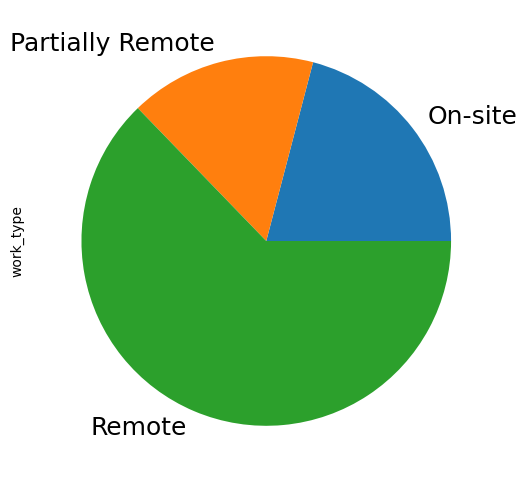

In [51]:

plt.figure(figsize=(10,6))
df.groupby('work_type')['work_type'].count().plot(kind='pie', fontsize=18)

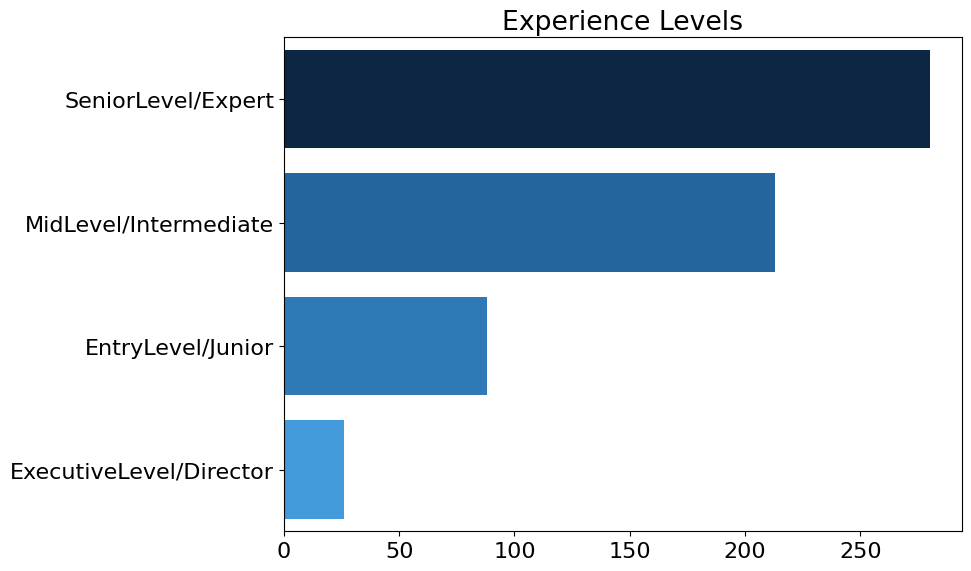

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams.update({'font.size': 16})

experience_level = df["experience_level"].value_counts()
experience_level = experience_level.sort_values(ascending=False)
experience_level.index = ["SeniorLevel/Expert", "MidLevel/Intermediate", "EntryLevel/Junior", "ExecutiveLevel/Director"]

colors = ['#03254c', '#1167b1', '#187bcd', '#2a9df4']
ax = sns.barplot(x=experience_level.values, y=experience_level.index, palette=colors, orient="h")

plt.title("Experience Levels")
plt.tight_layout()
plt.show()



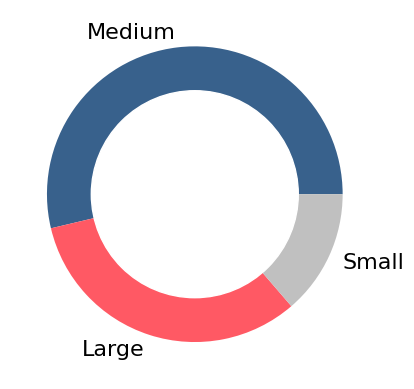

In [79]:
names = ['Medium', 'Large', 'Small']
size = df['company_size'].value_counts()
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['#38618c','#ff5964','silver'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<AxesSubplot:>

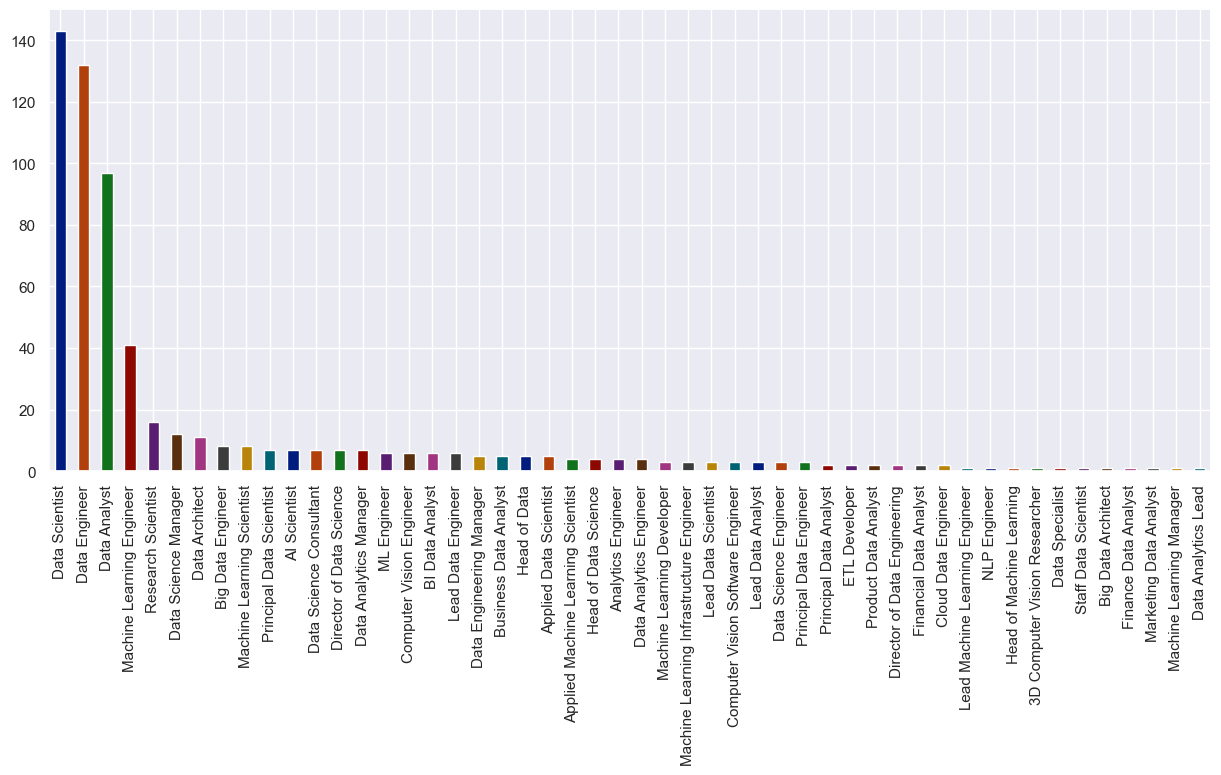

In [261]:

plt.figure(figsize=(15,6))
df['job_title'].value_counts().plot(kind='bar',color=sns.color_palette("dark"))


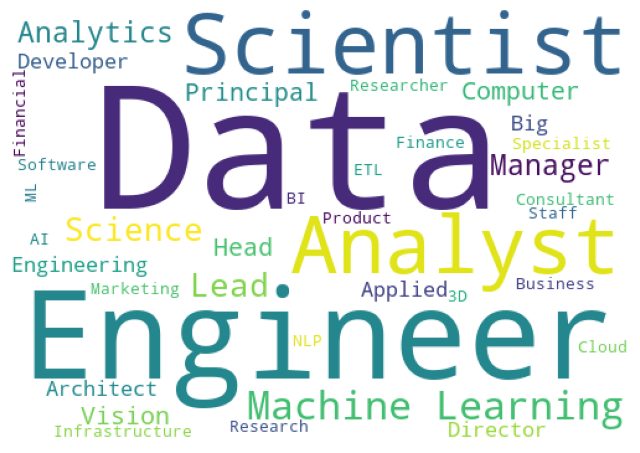

In [319]:
x = df["job_title"].unique()
plt.subplots(figsize= (8,8))

wordcloud = WordCloud( background_color = "white", 
                        width = 500,
                        height = 350).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")     

plt.show()

In [333]:
converted_country = coco.convert(names=df.groupby('company_location').count().sort_values(by='work_year',ascending=False).index)
data = dict(type='choropleth', 
            colorscale = 'tropic',
            locations = converted_country, 
            z = df.groupby('company_location').count().sort_values(by='work_year',ascending=False)['work_year'])
layout = dict(title = 'Company Location',
              geo = dict( projection = {'type':'robinson'},
                         showlakes = False))
x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x)

In [272]:

ax= px.treemap(df,path=['company_location'],title="Company Location")  
ax.show()

In [343]:
converted_country = coco.convert(names=df.groupby('company_location').mean().sort_values(by='work_year',ascending=False).index)
data = dict(type='choropleth', 
            colorscale = 'redor',
            locations = converted_country, 
            z = df.groupby('company_location').mean().sort_values(by='work_year',ascending=False)['work_year'])
layout = dict(title = 'Company Location',
              geo = dict( projection = {'type':'robinson'},
                         showlakes = False))
x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x)

In [344]:
ax= px.treemap(df,path=['employee_residence'],title="Employee Residence")
ax.show()

### Salary analysis

Text(0.5, 1.0, 'Average salary over the years')

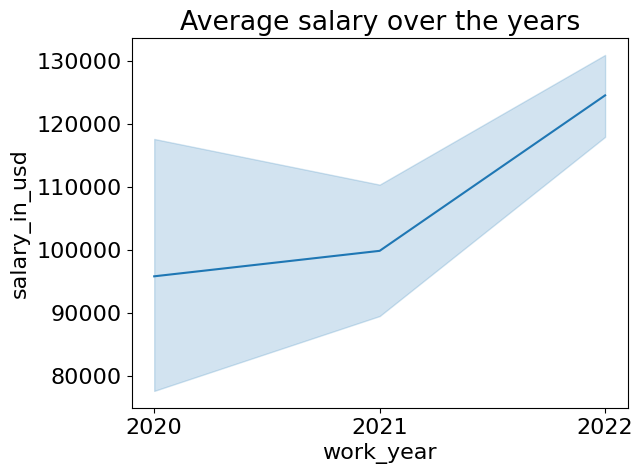

In [145]:
sns.lineplot(x= "work_year", y= "salary_in_usd" , data = df );
plt.xticks(df["work_year"].unique());
plt.title("Average salary over the years")

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

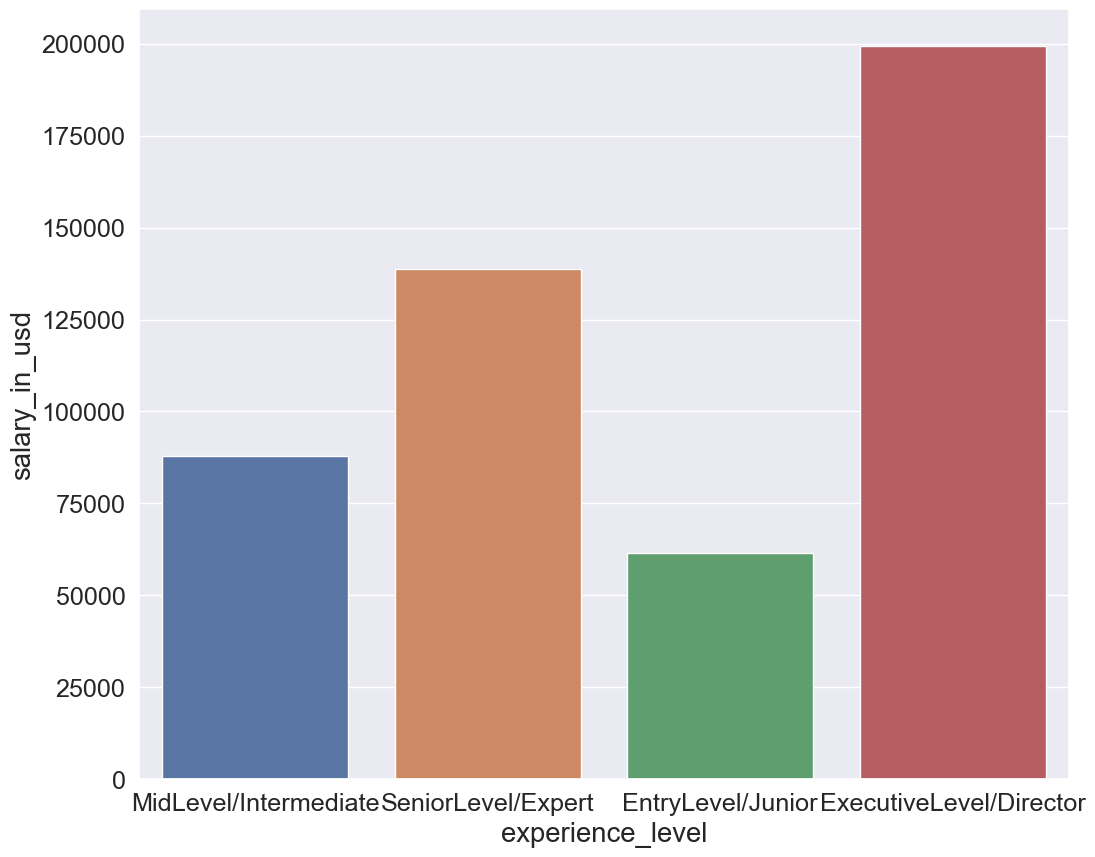

In [284]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale=1.65)
sns.barplot(data=df,x='experience_level',y='salary_in_usd',ci=0)

In [301]:
fig = px.ecdf(df, x="salary_in_usd", color="company_size", markers=True)
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    font_size=28,
    legend_title_font_color="darkblue"
)
fig.show()

In [305]:
fig = px.scatter(df, x ="salary_in_usd", y= "work_type", size = "salary_in_usd", color = "employment_type", title = "Salary by Employment Type for each Experience Level & ", template = "seaborn")
fig.update_layout(
    yaxis_title="Experience Level",
    xaxis_title="Salary (USD)",
    legend_title = "Employment Type:",
    font_size=20,
    legend=dict(orientation="v"))
fig.show()

Text(0.5, 1.0, 'Average salary by work type for each Experience level')

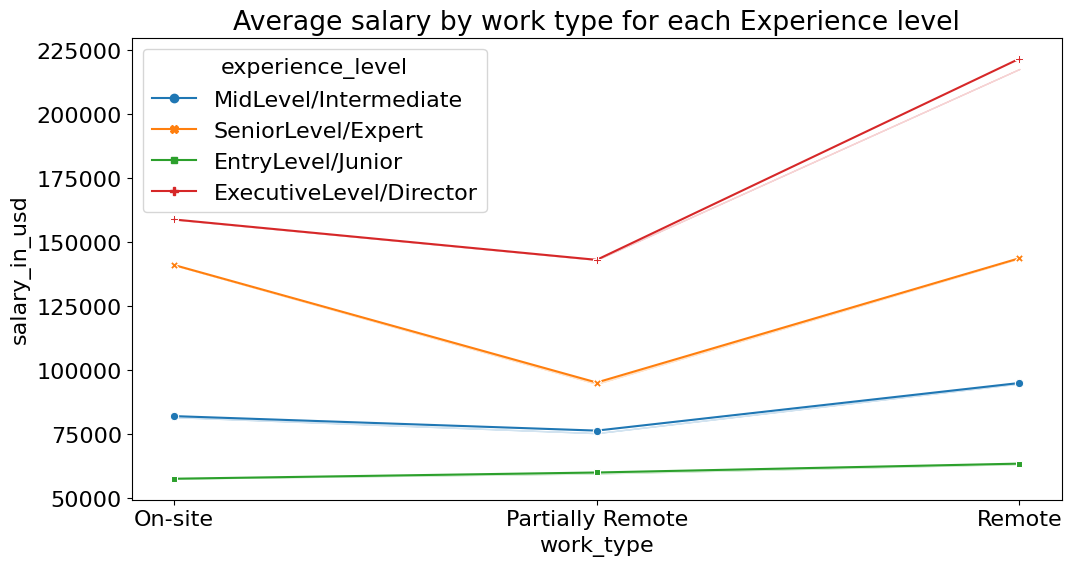

In [178]:
plt.figure(figsize=(12,6))
sns.lineplot( x = "work_type" , y = "salary_in_usd" , hue = "experience_level" , data =df , ci = 0 , style="experience_level" ,markers=True, dashes=False )
plt.title("Average salary by work type for each Experience level")

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

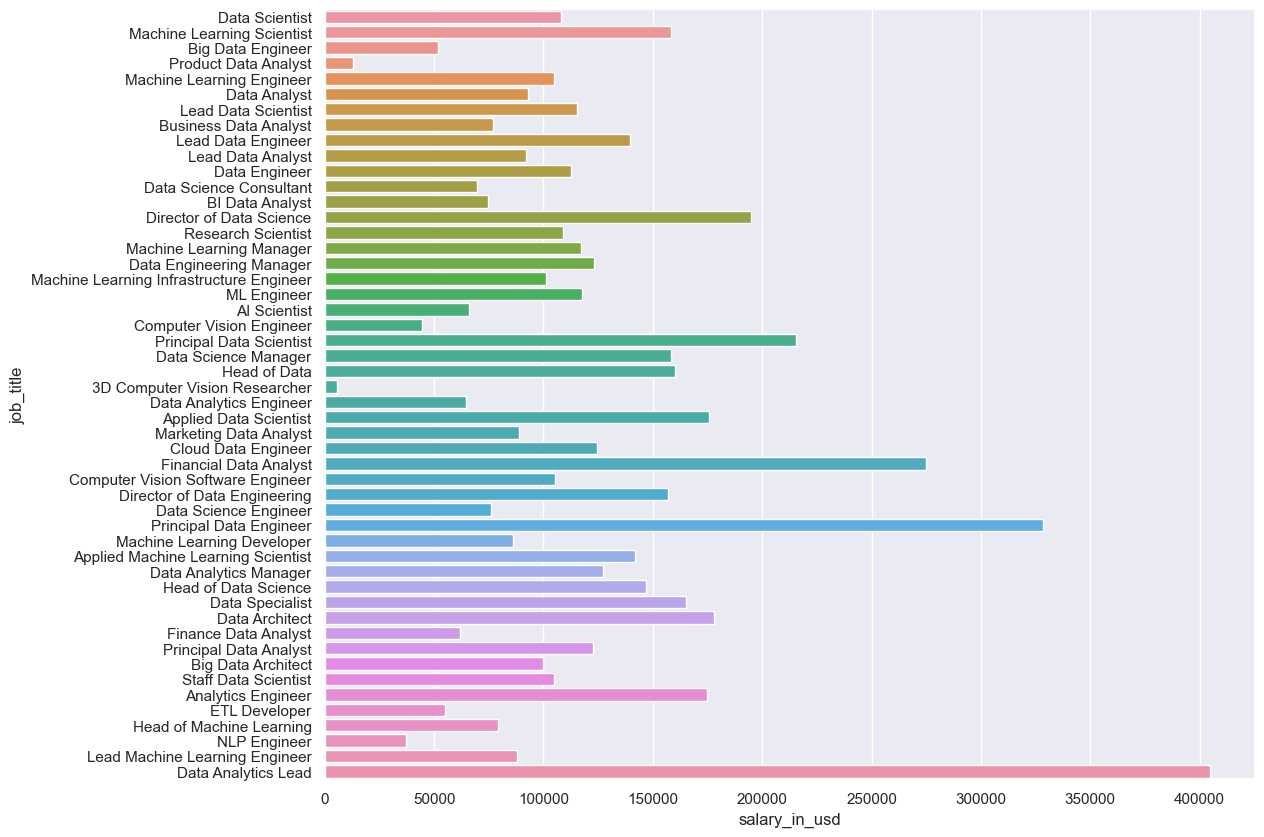

In [227]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data=df,x='salary_in_usd',y='job_title',ci=0)

<AxesSubplot:xlabel='salary_in_usd', ylabel='company_location'>

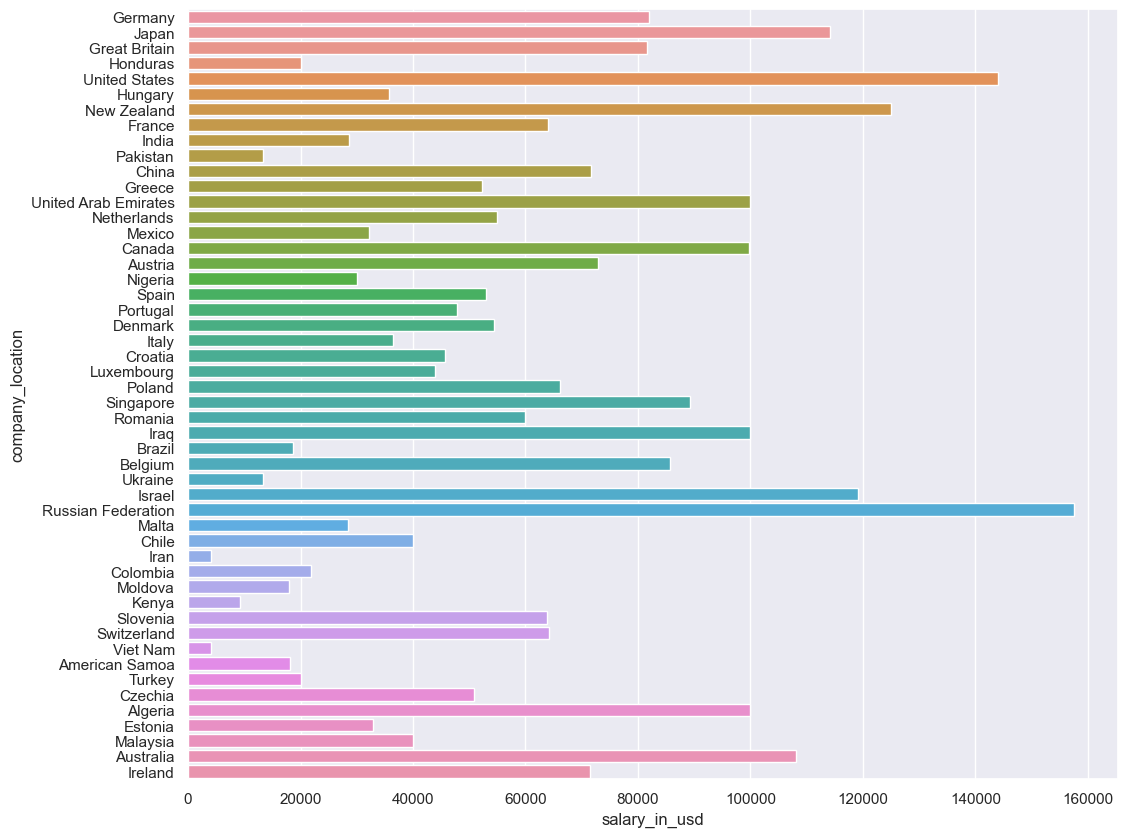

In [234]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data=df,x='salary_in_usd',y='company_location',ci=0)

<AxesSubplot:xlabel='salary_in_usd', ylabel='employee_residence'>

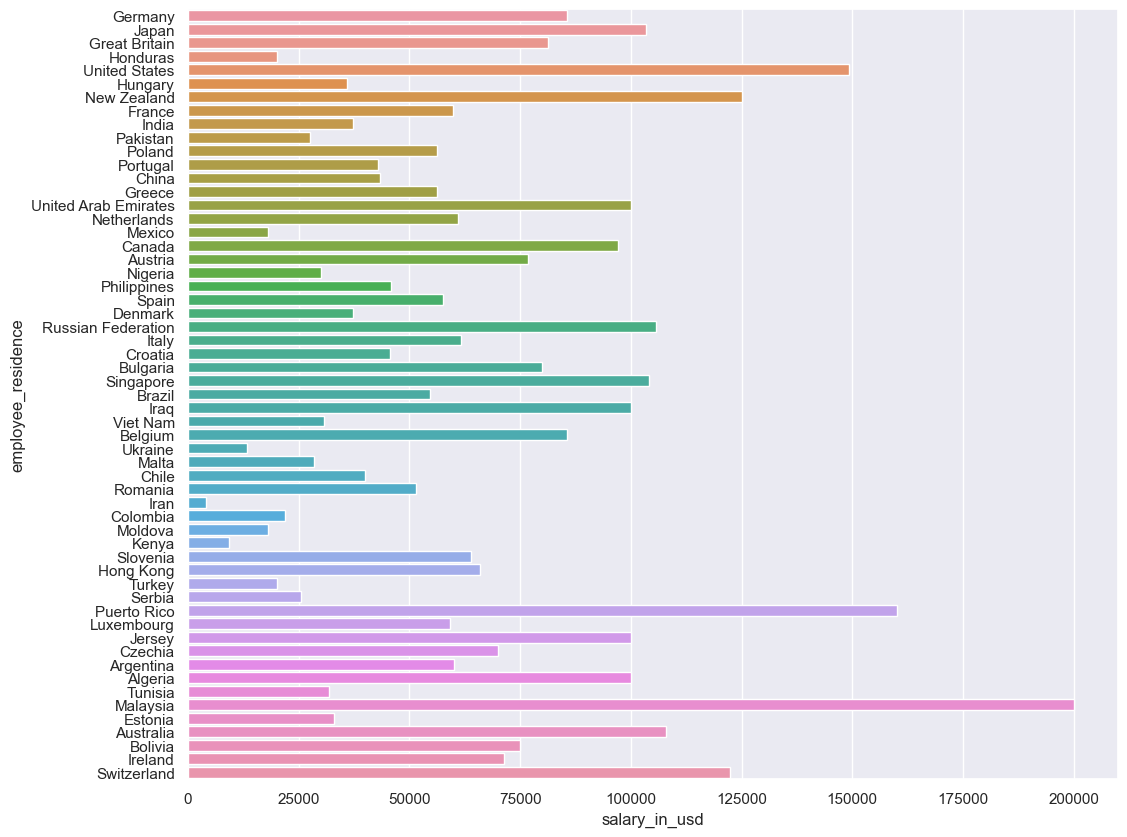

In [236]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data=df,x='salary_in_usd',y='employee_residence',ci=0)